# ARP Lecture 10

**The Linear (and Nonlinear) Reactivity Model**

## Linear Reactivity Model

**Assumption 1**: a core is composed of $N \ge 1$ batches of identical fuel assemblies.  


**Assumption 2**: reactivity of the fuel varies linearly with burnup, i.e.,

$$
 \rho(B) = \rho_0 - AB \, ,
$$

where $\rho$ is reactivity, $B$ is burnup (GWd/MTU), and $\rho_0$ and $A$ are constants. Reactivity can also be defined as 

$$
 \rho = \frac{k-1}{k} \, ,
$$

where $k$ is the multiplication factor.

<img src="pwr.png" alt="PWR Assembly" style="width: 200px;"/>

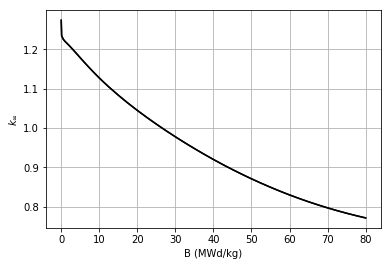

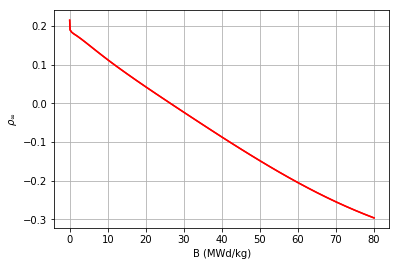

In [8]:
import numpy as np
import matplotlib.pyplot as plt
with open('pwr.log', 'r') as f:
    lines = f.readlines()
B, k = [], []
for i in range(41, 83):
    B.append(float(lines[i][40:].split()[0]))
    k.append(float(lines[i][40:].split()[1]))
B = np.array(B)
k = np.array(k)
plt.figure(1)
plt.plot(B, k, 'k-')
plt.xlabel('B (MWd/kg)')
plt.ylabel(r'$k_{\infty}$')
plt.grid(True)
plt.figure(2)
plt.plot(B, (k-1)/k, 'r')
plt.xlabel('B (MWd/kg)')
plt.ylabel(r'$\rho_{\infty}$')
plt.grid(True)
plt.show()

## Averaging Over the Core

Simplest $N$-batch model:

$$
 \bar{\rho} = \frac{1}{N} \sum^N_{i=1} \rho_i \, .
$$

Here, $\rho_i$ is the reactivity of the $i$th batch.  Usually, the 
infinite multiplication factor $k_{\infty}$ is used, so $\rho_i$ represents the reactivity of an infinite 
reactor composed of the $i$th-batch fuel.

To include losses  due to leakage, the core reactivity can be redefined as 

$$
\bar{\rho} = \frac{1}{N} \sum^N_{i=1} \rho_i  - \rho_L \, ,
$$

where $\rho_L$ is the reactivity penalty due to leakage and is typically close to 4\%.

## Estimating Cycle Lengths for $N$-Batch Cores

Consider an $N$-batch core at the end of cycle (EOC).  The EOC reactivity of each batch is

$$
 \begin{split}
  \rho_1 &= \rho_0 -  AB_c \\
  \rho_2 &= \rho_0 - 2AB_c \\
         & \vdots \\
  \rho_N &= \rho_0 - NAB_c \, ,
 \end{split}
$$

where $B_c$ is the **cycle length**, i.e., the (average) burnup each batch accumulates between fuel reloads.  The **discharge burnup** is $B_d = N B_c$.



**Exercises**: Let $B_s = \rho_0/A$ be the one-batch cycle length.  
 - How does $B_c$ for $N$ batches compare to $B_s$?
 - What is the *discharge* burnup $B_d$ for the $N$-batch case?  Remember, a batch of fuel in an $N$-batch scheme is in the core for $N$ cycles.
 - Estimate $\rho_0$ and $A$ from the previous slide.  What's $B_c$ and $B_d$?
 - What is $B_d/B_s$ in the limit $N \to \infty$?

## Nonlinear Reactivity Model

More general $N$-batch, NRM: 

$$
  \frac{1}{N} \sum_{i=1}^N \rho(iB_c) = \rho_L \, ,
$$

where leakage is included explicitly.  Once $B_c$ is determined, batch-average properties can be evaluated for any burnup $B \in [0, B_c]$.  

Adding to the complication, $\rho$ depends on more than just $B$: it depends also on $T_F$, $T_C$, $C_B$, cladding, etc.  Moreover, both LRM and the NRM equation above assume *equal batch powers*.  **Realistic or no?**

### Unequal Power Sharing

Let $\rho_i = \frac{F_i - A_i}{F_i}$, where $F_i$ and $A_i$ are fission/absorption rates in region $i$.

Core reactivity then 

$$
 \rho = \frac{ \sum^N_{i=1} (F_i-A_i) }{ \sum^N_{i=1} F_i} = 
    \frac{ \sum^N_{i=1} F_i \rho_i  }{ \sum^N_{i=1} F_i} \approx \frac{ \sum^N_{i=1} q_i \rho_i  }{ \sum^N_{i=1} q_i} 
   = \frac{ \sum^N_{i=1} q_i \rho_i  }{ Q}
$$

where $q_i$ is $i$th batch power and $Q$ is total power.  Finally, let $f_i = q_i/Q$ and $\sum^N_i f_i = 1$ so that

$$
  \rho = \sum^N_{i=1} f_i \rho_i \, .
$$